# Temel Bileşen Analizi (PCA)

Temel fikir, çok değişkenli verinin ana özelliklerini daha az sayıda değişken/bileşen ile temsil etmektir.

Diğer bir ifade ile, küçük miktarda bir bilgi kaybını göze alıp değişken boyutunu azaltmaktır.

![](image06.png)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
df = pd.read_csv("USArrests.csv").copy()
df.index = df.iloc[:, 0]
df = df.iloc[:, 1:5]
df.index.name = None
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


PCA yapmak için öncelikle scale etmek gerekmektedir.

In [3]:
from sklearn.preprocessing import StandardScaler

df = StandardScaler().fit_transform(df)
df[0:5, 0:5]

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393]])

In [5]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df)

In [6]:
bilesen_df = pd.DataFrame(data=pca_fit, columns=['first_component', 'second_component'])

In [11]:
bilesen_df.head()

,first_component,second_component
0,0.985566,-1.133392
1,1.950138,-1.073213
2,1.763164,0.745957
3,-0.141420,-1.119797
4,2.523980,1.542934


In [14]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129])

Bu bize açıklanan varyans oranını veriyor. İkisinin toplamı 86.7 dersek, en çok açıklama oranına sahip ilk iki değişken tüm verinin %86.7 sini açıklayabildiği anlamına geliyor ve bu iyi bir sıkıştırma oranı.

In [15]:
pca = PCA().fit(df)

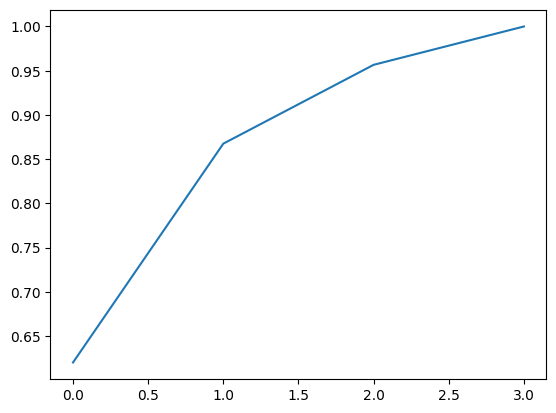

In [17]:
plt.plot(np.cumsum(pca.explained_variance_ratio_));

Tüm değişkenler ile indirgeme yaptığımızda %100 ü açıklanmış oluyor.